## COMENZANDO ML

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity


1.5.0


In [20]:
df_machinelearning = pd.read_csv('C:/Users/Ani/Desktop/BVNNY/Master/TFM/Datasets/df_final.csv', sep=',')


In [21]:
df_machinelearning.head()

,Especie_planta,Toxic_Yes,Conocimiento_sobre_plantas_enc,Tiempo_de_dedicacion_enc,Clima_No_Seco,Tonos_Cálidos,Tonos_Fríos,Tonos_Me es indiferente,Vivienda_Adosado,Vivienda_Apartamento,Vivienda_Chalet,Dificultad,Ubicación,Estatura,Frecuencia_Riego,Tolera_mediterráneo_seco,Adecuado_para_mascotas,Sensación
0,Costilla de Adán,0.0,1.0,1.0,1,0,1,0,0,0,1,2,0,2,2,0,0,1
1,Costilla de Adán,1.0,1.0,2.0,1,0,1,0,1,0,0,2,0,2,2,0,0,1
2,Costilla de Adán,1.0,1.0,1.0,1,0,0,1,0,1,0,2,0,2,2,0,0,1
3,Costilla de Adán,0.0,1.0,1.0,0,1,0,0,0,1,0,2,0,2,2,0,0,1
4,Costilla de Adán,1.0,1.0,2.0,1,0,0,1,0,0,1,2,0,2,2,0,0,1


## VISUALIZACIÓN

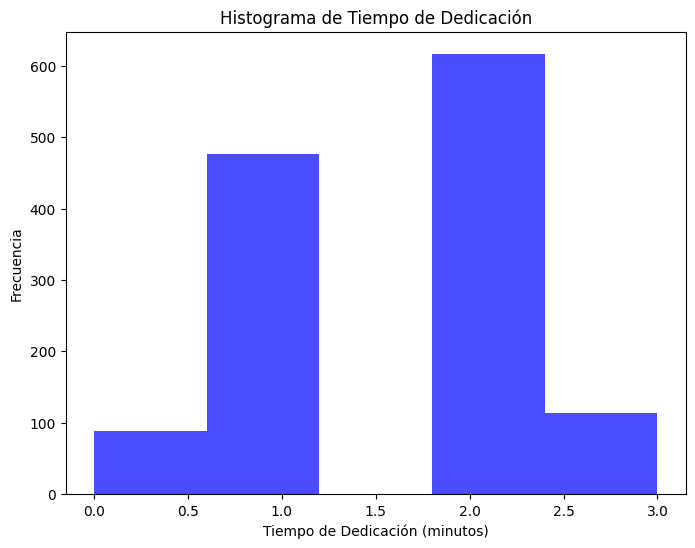

In [22]:
#Histograma de 'Tiempo_de_dedicacion_enc'
plt.figure(figsize=(8, 6))
plt.hist(df_machinelearning['Tiempo_de_dedicacion_enc'], bins=5, alpha=0.7, color='blue')
plt.title('Histograma de Tiempo de Dedicación')
plt.xlabel('Tiempo de Dedicación (minutos)')
plt.ylabel('Frecuencia')
plt.show()

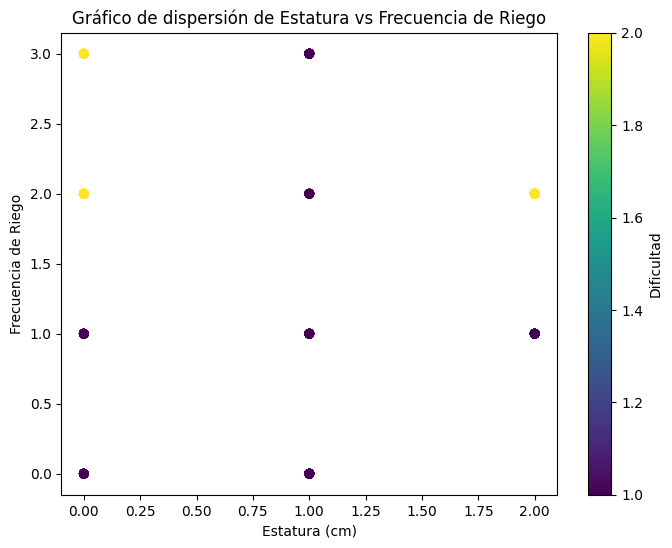

In [23]:
# Gráfico de dispersión entre 'Estatura' y 'Frecuencia_Riego', coloreado por 'Dificultad'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_machinelearning['Estatura'], df_machinelearning['Frecuencia_Riego'], c=df_machinelearning['Dificultad'], cmap='viridis')
plt.title('Gráfico de dispersión de Estatura vs Frecuencia de Riego')
plt.xlabel('Estatura (cm)')
plt.ylabel('Frecuencia de Riego')
plt.colorbar(scatter, label='Dificultad')
plt.show()


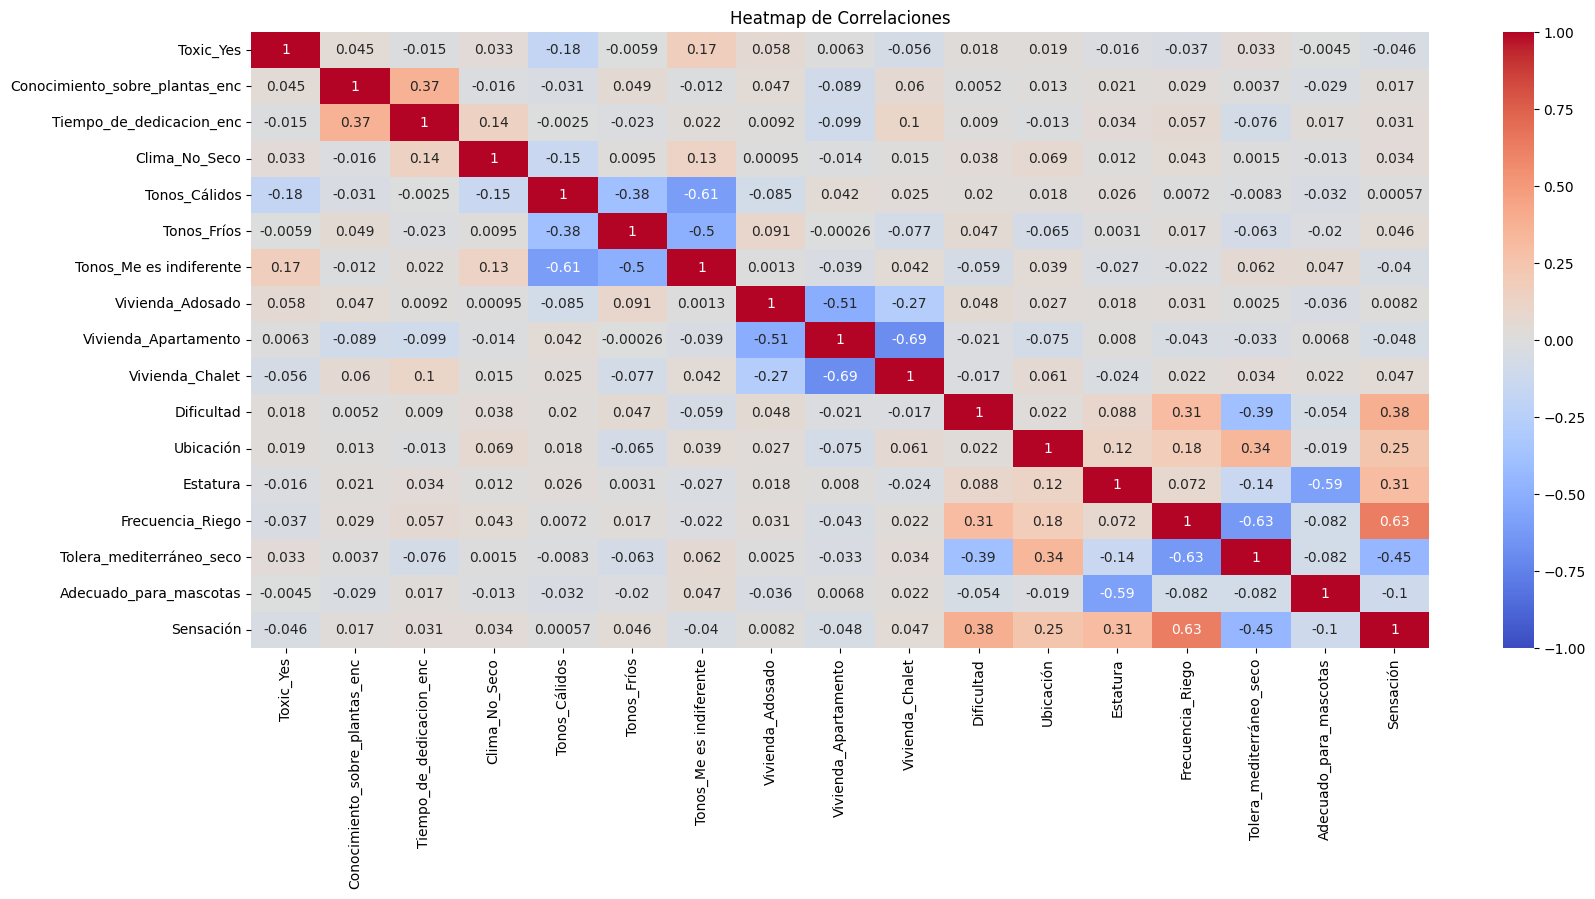

In [24]:
#Heatmap/ mapa de Correlaciones entre Variables Numéricas
numeric_cols = df_machinelearning.select_dtypes(include='number').columns
df_numeric = df_machinelearning[numeric_cols]

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(19, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap de Correlaciones')
plt.show()


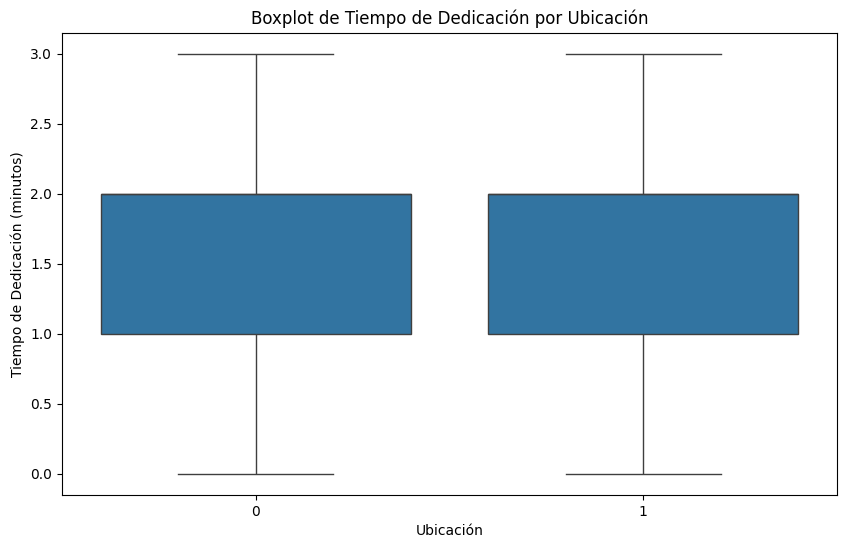

In [25]:
#Boxplot de 'Tiempo_de_dedicacion_enc' por 'Ubicación'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ubicación', y='Tiempo_de_dedicacion_enc', data=df_machinelearning)
plt.title('Boxplot de Tiempo de Dedicación por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Tiempo de Dedicación (minutos)')
plt.show()

## PROBANDO PRIMER MODELO: KNN

In [26]:
df_char= df_machinelearning[["Conocimiento_sobre_plantas_enc","Vivienda_Chalet", "Tonos_Cálidos", "Ubicación"]]

In [27]:
knn = NearestNeighbors(n_neighbors=3, metric='cosine') #3 es la cantidad de recomendaciones que va a coger
knn.fit(df_char)

NearestNeighbors(metric='cosine', n_neighbors=3)

In [28]:
new_user_data = {
    'Conocimiento_sobre_plantas_enc': 2.0,
    'Vivienda_Chalet': 1,
    'Tonos_Cálidos': 1,
    'Ubicación': 0
}
X_new_user = pd.DataFrame([new_user_data])
X_new_user

,Conocimiento_sobre_plantas_enc,Vivienda_Chalet,Tonos_Cálidos,Ubicación
0,2.0,1,1,0


In [29]:
distances, indices = knn.kneighbors(X_new_user, n_neighbors=3)
indices[0]

array([ 45, 103, 109], dtype=int64)

In [30]:
df_char.iloc[indices[0]] #primer recomendador (humilde)

,Conocimiento_sobre_plantas_enc,Vivienda_Chalet,Tonos_Cálidos,Ubicación
45,2.0,1,1,0
103,2.0,1,1,0
109,2.0,1,1,0


In [37]:
indices = [45, 103, 109]
filtered_df = df_machinelearning.loc[indices, 'Especie_planta']
print(filtered_df)

45      Costilla de Adán
103     Costilla de Adán
109    Cactus de Navidad
Name: Especie_planta, dtype: object


In [39]:
# Filtra las especies de plantas correspondientes
filtered_df = df_machinelearning.loc[indices, 'Especie_planta']
#print(filtered_df)

# Calcula el porcentaje de cada especie de planta
percentages = filtered_df.value_counts(normalize=True) * 100
print(percentages)

Especie_planta
Costilla de Adán     66.666667
Cactus de Navidad    33.333333
Name: proportion, dtype: float64


## Biblioteca Surprise

In [32]:
# Prepara los datos para el modelo
# Utilizamos solo las características numéricas para el entrenamiento del modelo
X = df_machinelearning.drop(columns=['Especie_planta'])
y = df_machinelearning['Especie_planta']

# Ajustamos el modelo de Nearest Neighbors
n_neighbors = 5
nneighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine').fit(X)

# Ejemplo de datos del usuario (puedes cambiar estos valores por las respuestas del usuario)
usuario_respuestas = np.array([[0.0, 1.0, 2.0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1]])

# Encuentra los vecinos más cercanos
distances, indices = nneighbors.kneighbors(usuario_respuestas)

# Obtén las especies de plantas correspondientes
especies_recomendadas = y.iloc[indices[0]].values

print("Especies de plantas recomendadas:", especies_recomendadas)

Especies de plantas recomendadas: ['Costilla de Adán' 'Costilla de Adán' 'Costilla de Adán'
 'Costilla de Adán' 'Costilla de Adán']


c:\Users\Ani\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Selección de características y objeto

In [33]:
X = df_machinelearning.drop(columns=['Especie_planta', 'Sensación'])
y = df_machinelearning['Sensación']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Puedes ajustar el valor de k (n_neighbors)
knn.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Informe de clasificación
print(classification_report(y_test, y_pred))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.92      0.94      0.93       163
           2       1.00      0.47      0.64        19

    accuracy                           0.91       259
   macro avg       0.93      0.79      0.83       259
weighted avg       0.91      0.91      0.90       259



In [34]:
#Ajuste de Hiperparámetros con Validación Cruzada
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores para n_neighbors
param_grid = {'n_neighbors': range(1, 21)}

# Realizar la búsqueda de la mejor combinación de parámetros
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Mejor parámetro encontrado
print(f"Mejor valor de n_neighbors: {grid_search.best_params_['n_neighbors']}")

# Reentrenar el modelo con el mejor parámetro
knn_best = grid_search.best_estimator_
knn_best.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo ajustado
y_pred_best = knn_best.predict(X_test_scaled)

# Evaluar el modelo ajustado
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy con el mejor k: {accuracy_best:.2f}')
print(classification_report(y_test, y_pred_best))

Mejor valor de n_neighbors: 10
Accuracy con el mejor k: 0.91
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.92      0.95      0.93       163
           2       1.00      0.47      0.64        19

    accuracy                           0.91       259
   macro avg       0.94      0.79      0.83       259
weighted avg       0.91      0.91      0.91       259



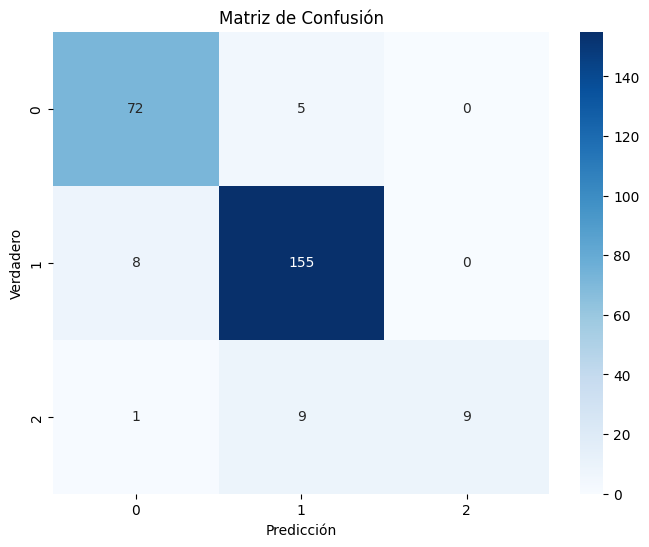

In [35]:
#matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


## Sistema de recomendación personalizado

## PROBANDO RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       163
           2       1.00      1.00      1.00        19

    accuracy                           1.00       259
   macro avg       1.00      1.00      1.00       259
weighted avg       1.00      1.00      1.00       259



In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

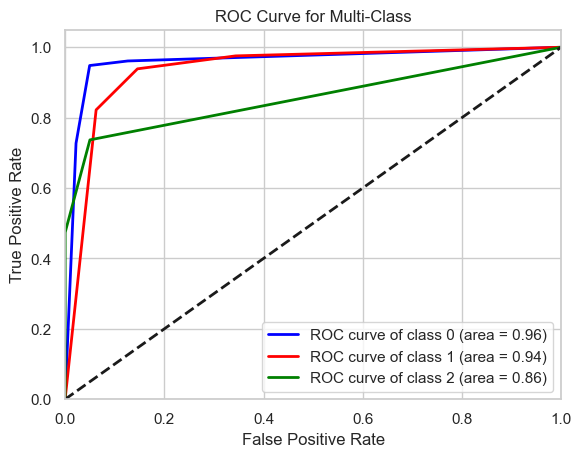

AUC Macro: 0.92
AUC Weighted: 0.94


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Calcular las probabilidades predichas
y_probas = knn.predict_proba(X_test_scaled)

# Binarizar las etiquetas para la evaluación multi-clase
from sklearn.preprocessing import label_binarize
n_classes = len(set(y_test))
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calcular ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

# Calcular el AUC macro y ponderado
roc_auc_macro = roc_auc_score(y_test_bin, y_probas, average="macro", multi_class="ovr")
roc_auc_weighted = roc_auc_score(y_test_bin, y_probas, average="weighted", multi_class="ovr")

print(f'AUC Macro: {roc_auc_macro:.2f}')
print(f'AUC Weighted: {roc_auc_weighted:.2f}')



## REGRESION LINEAL

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el objetivo (y)
X = df_machinelearning.drop(columns=['Especie_planta', 'Toxic_Yes'])
y = df_machinelearning['Toxic_Yes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1036, 16), (259, 16), (1036,), (259,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar el modelo
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
classification_report_log_reg = classification_report(y_test, y_pred_log_reg)

accuracy_log_reg, classification_report_log_reg


(0.5328185328185329,
 '              precision    recall  f1-score   support\n\n         0.0       0.49      0.34      0.40       120\n         1.0       0.55      0.70      0.62       139\n\n    accuracy                           0.53       259\n   macro avg       0.52      0.52      0.51       259\nweighted avg       0.52      0.53      0.52       259\n')

## 